In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
import hvplot.pandas
import panel as pn
pn.extension()

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv('kickstarter.csv')
data_df.head()

,ID,name,category,main_category,country,currency,launched,deadline,goal,pledged,state,backers,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,GBP,2015-08-11 12:12:28,2015-10-09,1000.0,0.0,failed,0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,USD,2017-09-02 04:43:57,2017-11-01,30000.0,2421.0,failed,15,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,US,USD,2013-01-12 00:20:50,2013-02-26,45000.0,220.0,failed,3,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,USD,2012-03-17 03:24:11,2012-04-16,5000.0,1.0,failed,1,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,USD,2015-07-04 08:35:03,2015-08-29,19500.0,1283.0,canceled,14,1283.0,19500.00


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   country           378661 non-null  object 
 5   currency          378661 non-null  object 
 6   launched          378661 non-null  object 
 7   deadline          378661 non-null  object 
 8   goal              378661 non-null  float64
 9   pledged           378661 non-null  float64
 10  state             378661 non-null  object 
 11  backers           378661 non-null  int64  
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 40.4+ MB


In [4]:
data_df.describe()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


In [5]:
percent_missing = (data_df.isnull().sum() * 100 / len(data_df)).round(2)
missing_value_df = pd.DataFrame({'column_name': data_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

,column_name,percent_missing
ID,ID,0.0
name,name,0.0
category,category,0.0
main_category,main_category,0.0
country,country,0.0
currency,currency,0.0
launched,launched,0.0
deadline,deadline,0.0
goal,goal,0.0
pledged,pledged,0.0


### Exercise 1. Format

- __(1 point)__ change the format of columns, ``launched`` and ``deadline``, to datetime
- __(1 point)__ generate new columns to represent the ``year`` and ``month`` during which the project was ``launched``

In [6]:
# Change the format to datetime
data_df["launched"] = pd.to_datetime(data_df["launched"])
data_df["deadline"] = pd.to_datetime(data_df["deadline"])

In [7]:
# Generate new columns
data_df["launch_year"] = data_df["launched"].dt.year
data_df["launch_month"] = data_df["launched"].dt.month

In [8]:
# Check
data_df.head()

,ID,name,category,main_category,country,currency,launched,deadline,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,launch_year,launch_month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,GBP,2015-08-11 12:12:28,2015-10-09,1000.0,0.0,failed,0,0.0,1533.95,2015,8
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,USD,2017-09-02 04:43:57,2017-11-01,30000.0,2421.0,failed,15,2421.0,30000.00,2017,9
2,1000004038,Where is Hank?,Narrative Film,Film & Video,US,USD,2013-01-12 00:20:50,2013-02-26,45000.0,220.0,failed,3,220.0,45000.00,2013,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,USD,2012-03-17 03:24:11,2012-04-16,5000.0,1.0,failed,1,1.0,5000.00,2012,3
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,USD,2015-07-04 08:35:03,2015-08-29,19500.0,1283.0,canceled,14,1283.0,19500.00,2015,7


### Exercise 2. Noisy data
- __(1 point)__ find out data with noisy launched time 
- __(1 point)__ and decide whether you want to fix the noise or remove the noise

In [9]:
data_df["launch_year"].unique()

array([2015, 2017, 2013, 2012, 2016, 2014, 2010, 2011, 2009, 1970, 2018])

In [10]:
noisy_data = data_df[(data_df['launch_year'] == 1970)]
noisy_data

,ID,name,category,main_category,country,currency,launched,deadline,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,launch_year,launch_month
2842,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,US,USD,1970-01-01 01:00:00,2010-09-15,5000.0,0.0,canceled,0,0.0,5000.00,1970,1
48147,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,US,USD,1970-01-01 01:00:00,2010-08-14,15000.0,0.0,canceled,0,0.0,15000.00,1970,1
75397,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,US,USD,1970-01-01 01:00:00,2010-05-21,700.0,0.0,canceled,0,0.0,700.00,1970,1
94579,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,US,USD,1970-01-01 01:00:00,2010-06-01,4000.0,0.0,canceled,0,0.0,4000.00,1970,1
247913,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,US,USD,1970-01-01 01:00:00,2010-05-04,10000.0,0.0,canceled,0,0.0,10000.00,1970,1
273779,462917959,Identity Communications Infographic (Canceled),Design,Design,US,USD,1970-01-01 01:00:00,2010-04-10,500.0,0.0,canceled,0,0.0,500.00,1970,1
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CH,CHF,1970-01-01 01:00:00,2015-10-31,1900.0,0.0,suspended,0,0.0,1905.97,1970,1


### I have identified 7 records with a launch date in 1970, which appears to be noisy data. 
### Given that our dataset primarily focuses on projects launched between 2009 and 2018, 
### I decided to remove these outliers as they do not align with the dataset's main timeframe.
### This action ensures that our analysis remains consistent with the intended scope.

In [11]:
## Remove the noisy data from the DataFrame
data_df = data_df[data_df["launch_year"] > 1970]

In [12]:
## Check if successfully remove
data_df["launch_year"].unique()

array([2015, 2017, 2013, 2012, 2016, 2014, 2010, 2011, 2009, 2018])

### Exercise 3. Success rate

- Create a figure with two subplots (one column two rows) sharing
- Subplot 1: Use line chart to visualize the average success rate of projects (i.e., annual success rate) across years until 2017 (in other words, x-axis: year, y-axis: success rate) 
__(0.5 point for getting the right dataset and 0.5 point for generating the line chart)__
- Subplot 2: Use a bar plot to display the number of projects per year (until 2017) 
__(0.5 point for getting the right dataset and 0.5 point for generating the bar chart)__

In [13]:
data_df["state"].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [14]:
projects = data_df[data_df["launch_year"] <= 2017]
projects_count = projects[["state","launch_year"]].groupby("launch_year").count()
projects_count

,state
launch_year,
2009,1329
2010,10519
2011,26237
2012,41165
2013,44851
2014,67745
2015,77300
2016,57184
2017,52200


In [15]:
projects = data_df[data_df["launch_year"] <= 2017]
success = projects[projects["state"] == "successful"]
success_count = success[["state","launch_year"]].groupby("launch_year").count()
success_count

,state
launch_year,
2009,579
2010,4593
2011,12171
2012,17892
2013,19415
2014,21107
2015,20971
2016,18766
2017,18462


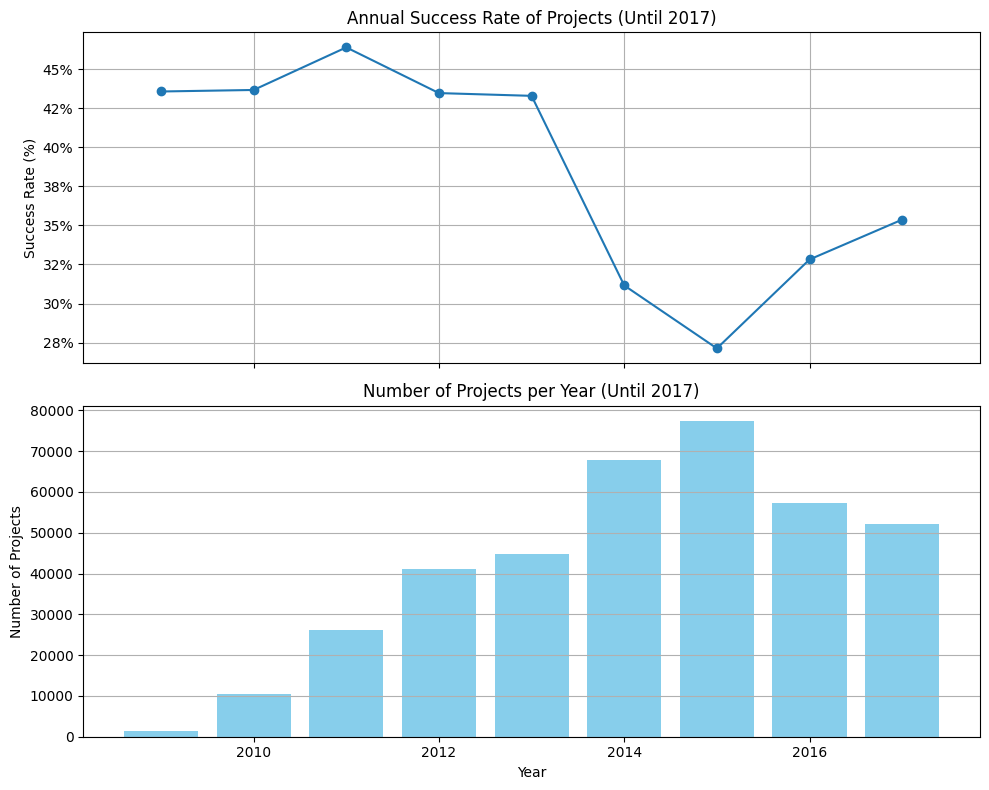

In [16]:
# Create a figure with two subplots (one column, two rows) sharing the same x-axis
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Calculate the success rate for each year (as a percentage)
success_rate = (success_count / projects_count)*100

# Subplot 1: Average success rate across years until 2017 (Line Chart)
axs[0].plot(success_rate.index, success_rate.values, marker='o', linestyle='-')
axs[0].set_ylabel('Success Rate (%)')
axs[0].set_title('Annual Success Rate of Projects (Until 2017)')
axs[0].grid(True)

# Calculate the number of projects per year
years = projects_count.index.tolist()
project_counts = projects_count["state"].tolist()

# Subplot 2: Number of projects per year until 2017 (Bar Plot)
axs[1].bar(years, project_counts, color='skyblue')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Projects')
axs[1].set_title('Number of Projects per Year (Until 2017)')
axs[1].grid(axis='y')

# Format the y-axis tick labels in the first subplot as percentages
axs[0].set_yticklabels(['{:.0f}%'.format(x) for x in axs[0].get_yticks()])

# Show the figure
plt.tight_layout()
plt.show()

In [17]:
success_rate

,state
launch_year,
2009,43.566591
2010,43.663846
2011,46.388688
2012,43.464108
2013,43.287775
2014,31.156543
2015,27.129366
2016,32.816872
2017,35.367816


### Exercise 4. Hypothesis and exploration

What hypothesis do you have for why success rate varies across years? Use a visualization to show preliminary results examining your hypothesis.

Write down your hypothesis here __(1 point)__:

- The fluctuation in the success rate across years may be attributed to the observed trend of increasing project funding goals, particularly during the years from 2014 to 2017.

Visualization __(1 point)__:

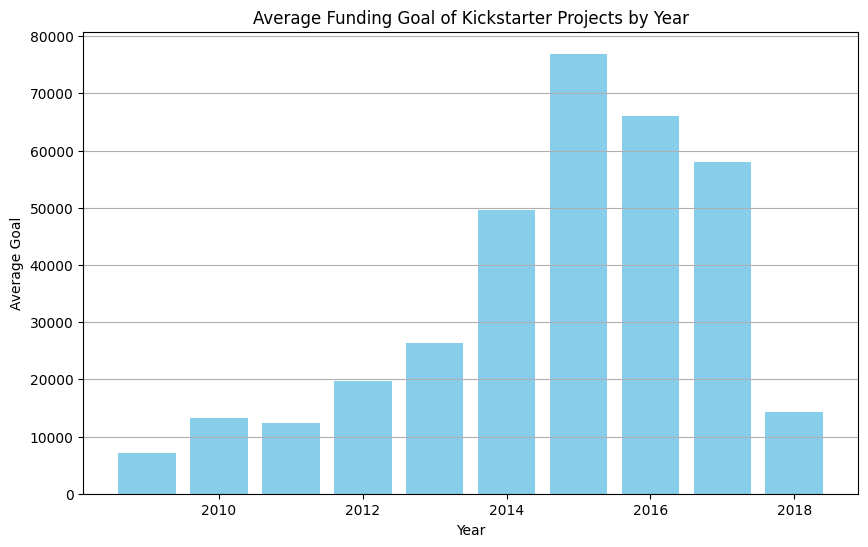

In [18]:
# Group the data by launch year and calculate the average goal for each year
average_goal_by_year = data_df.groupby('launch_year')['goal'].mean()

# Create a bar chart to visualize the average goal by year
plt.figure(figsize=(10, 6))
plt.bar(average_goal_by_year.index, average_goal_by_year.values, color='skyblue')
plt.title('Average Funding Goal of Kickstarter Projects by Year')
plt.xlabel('Year')
plt.ylabel('Average Goal')
plt.grid(axis='y')

plt.show()

### Exercise 5 (2 points). Dashboard

Build an interactive dashboard following the requirements below:
1. Could choose from one of the three countries: US, France (FR), United Kingdom of Great Britain and Northern Ireland (GB) _(tip: to use RadioButtonGroup)
2. Has a slider to choose the year of the visualization _(tip: to use IntSlider)
3. Could choose to visualize either the number of projects or the number of success projects (as y-axis) _(tip: to use RadioButtonGroup)
4. Has a line chart to visualize the y-axis across months of the year

In [19]:
import pandas as pd
import panel as pn
import holoviews as hv
import hvplot.pandas

# Create widgets for filtering
country_radio_button = pn.widgets.RadioButtonGroup(name='Country', options=['US', 'FR', 'GB'], value='US')
year_slider = pn.widgets.IntSlider(name='Year', start=int(data_df['launch_year'].min()), end=int(data_df['launch_year'].max()), value=int(data_df['launch_year'].min()))
visualization_radio_button = pn.widgets.RadioButtonGroup(name='Visualization', options=['Projects', 'Success Projects'], value='Projects')

# Define a function to update the chart based on widget values
def update_chart(selected_country, selected_year, selected_visualization):
    filtered_data = data_df[(data_df['country'] == selected_country) & (data_df['launch_year'] == selected_year)]

    if selected_visualization == 'Success Projects':
        filtered_data = filtered_data[filtered_data['state'] == 'successful']

    counts = filtered_data.groupby('launch_month').size()
    chart = hv.Curve((counts.index, counts.values), label='Count', kdims=['Month'], vdims=['Count'])
    return chart.opts(title='Project Counts by Month', xlabel='Month', ylabel='Count', width=800)

# Create a Panel app using pn.interact
dashboard = pn.interact(update_chart, selected_country=country_radio_button, selected_year=year_slider, selected_visualization=visualization_radio_button)

# Show the dashboard in the Jupyter Notebook
dashboard.servable()

Column(sizing_mode='fixed')
    [0] Column
        [0] RadioButtonGroup(name='Country', options=['US', 'FR', 'GB'], value='US')
        [1] IntSlider(end=2018, name='Year', start=2009, value=2009)
        [2] RadioButtonGroup(name='Visualization', options=['Projects', '...], value='Projects')
    [1] Row(sizing_mode='fixed')
        [0] HoloViews(Curve, height=300, name='interactive00798', sizing_mode='fixed', width=800)

In [20]:
import panel as pn
pn.serve(dashboard, port=5006)

Launching server at http://localhost:5006
